In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from pandas_datareader.data import DataReader

In [4]:
from datetime import datetime

In [5]:
from  __future__ import division

In [6]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [7]:
end = datetime.now()

start = datetime(end.year-1, end.month,end.day)

In [8]:
for stock in tech_list:
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [9]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,193.610159,189.667778,191.578929,191.704048,3.235292e+07,190.195691
std,21.664101,21.417283,21.508256,21.525631,1.401659e+07,21.070099
min,145.720001,142.000000,143.979996,142.190002,5.845015e+06,141.039642
25%,175.967499,173.747501,174.872501,174.832497,2.285825e+07,174.111996
50%,192.510002,189.750000,191.514999,191.285004,2.904540e+07,189.541374
75%,210.074997,206.832497,208.305000,208.872498,3.876472e+07,206.713852
max,233.470001,229.779999,230.779999,232.070007,9.624670e+07,229.392090


In [10]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2018-06-26 to 2019-06-26
Data columns (total 6 columns):
High         252 non-null float64
Low          252 non-null float64
Open         252 non-null float64
Close        252 non-null float64
Volume       252 non-null float64
Adj Close    252 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


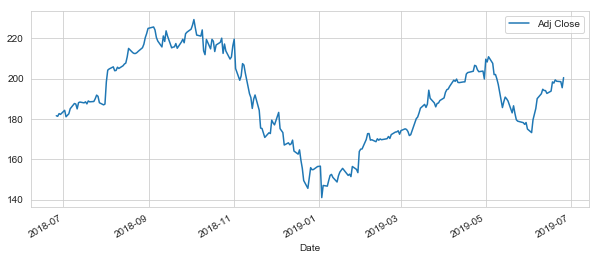

In [11]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

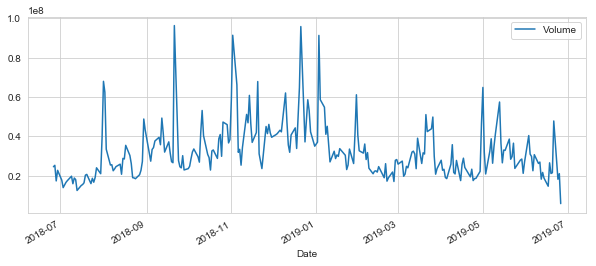

In [12]:
AAPL['Volume'].plot(legend=True, figsize=(10,4))

In [13]:
ma_day = [10,20,50]

for  ma in ma_day:
    column_name='MA for %s days' %(str(ma))
    
    AAPL[column_name] = pd.Series(AAPL['Adj Close']).rolling(window= ma).mean()

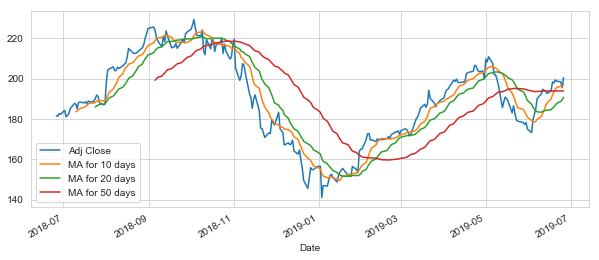

In [14]:
AAPL[['Adj Close','MA for 10 days', 'MA for 20 days','MA for 50 days']].plot(subplots=False, figsize=(10,4))

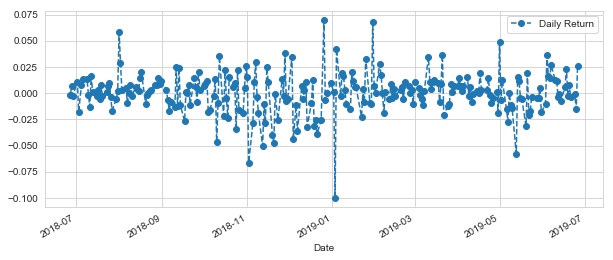

In [15]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4), legend=True, linestyle='--', marker='o')

C:\Users\Di\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


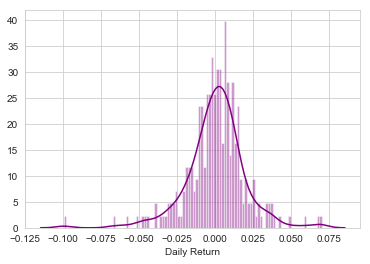

In [16]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

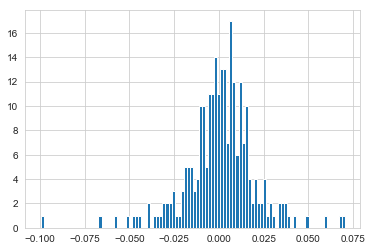

In [17]:
AAPL['Daily Return'].hist(bins=100)

In [18]:
closing_df= DataReader(tech_list,'yahoo', start, end)['Adj Close']

In [19]:
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-06-26,181.664673,1691.089966,1118.459961,97.496796
2018-06-27,181.398743,1660.510010,1103.979980,95.981407
2018-06-28,182.718643,1701.449951,1114.219971,97.053986
2018-06-29,182.334488,1699.800049,1115.650024,97.034309
2018-07-02,184.373459,1713.780029,1127.459961,98.411942


In [20]:
tech_rets = closing_df.pct_change()

In [21]:
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-06-26,NaN,NaN,NaN,NaN
2018-06-27,-0.001464,-0.018083,-0.012946,-0.015543
2018-06-28,0.007276,0.024655,0.009276,0.011175
2018-06-29,-0.002102,-0.000970,0.001283,-0.000203
2018-07-02,0.011183,0.008224,0.010586,0.014197


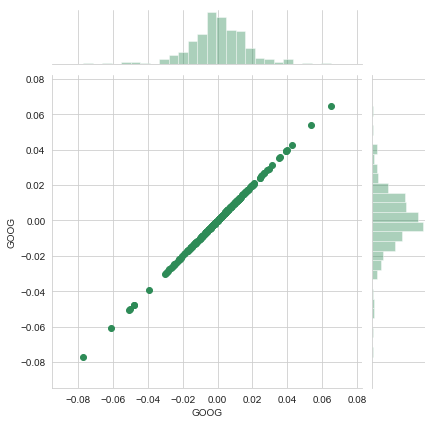

In [22]:
sns.jointplot('GOOG','GOOG',tech_rets, kind='scatter', color='seagreen')

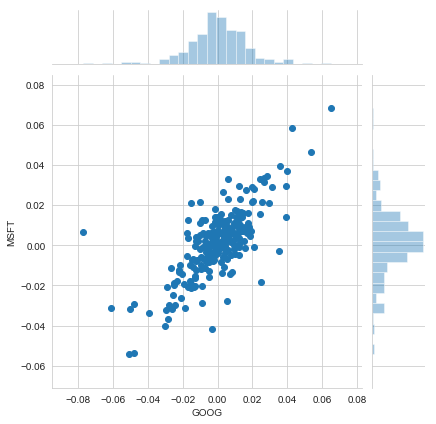

In [23]:
sns.jointplot('GOOG','MSFT', tech_rets, kind='scatter')

In [24]:
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-06-26,NaN,NaN,NaN,NaN
2018-06-27,-0.001464,-0.018083,-0.012946,-0.015543
2018-06-28,0.007276,0.024655,0.009276,0.011175
2018-06-29,-0.002102,-0.000970,0.001283,-0.000203
2018-07-02,0.011183,0.008224,0.010586,0.014197


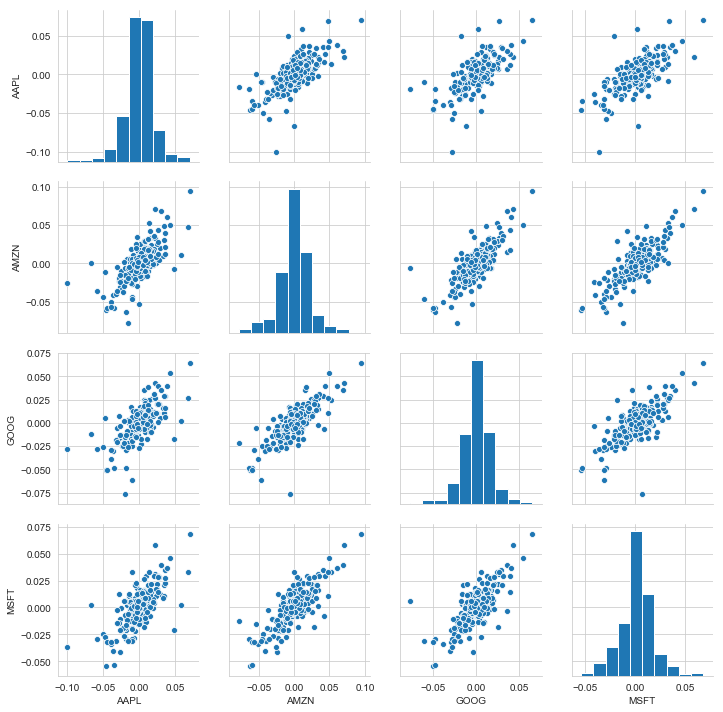

In [25]:
sns.pairplot(tech_rets.dropna())

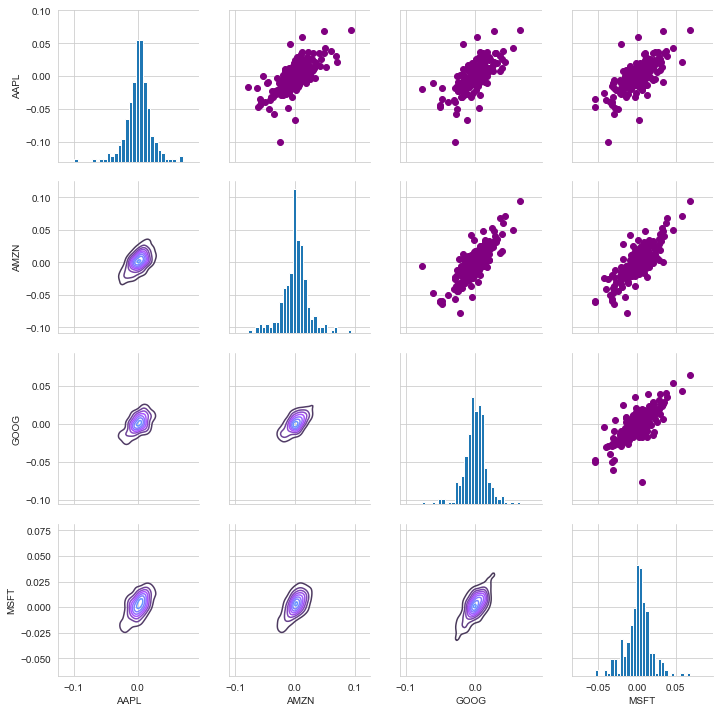

In [26]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter, color='purple')

returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

returns_fig.map_diag(plt.hist, bins=30)

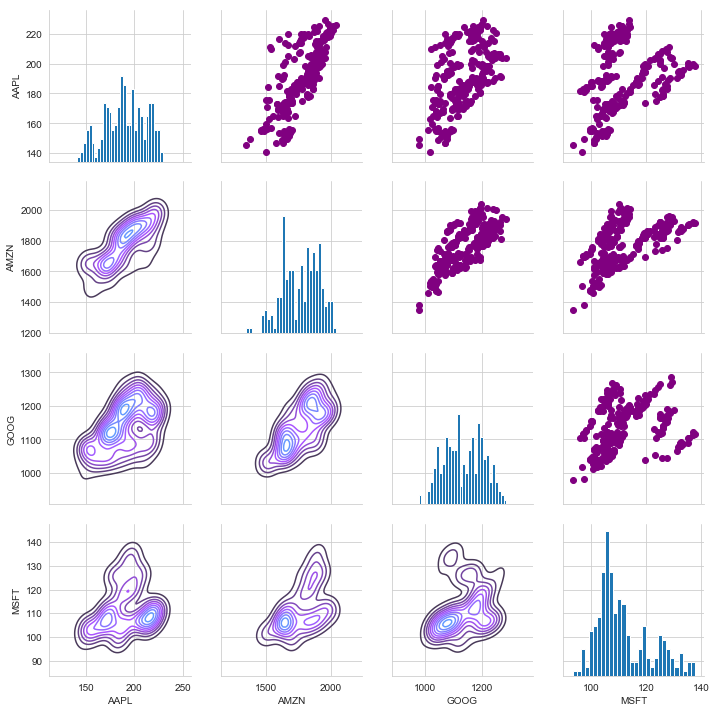

In [27]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter, color='purple')

returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

returns_fig.map_diag(plt.hist, bins=30)

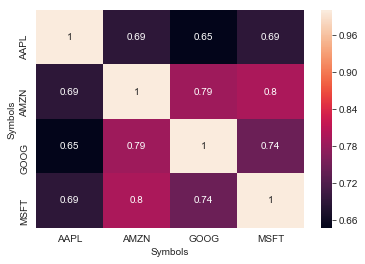

In [28]:
sns.heatmap(tech_rets.corr(), annot=True)

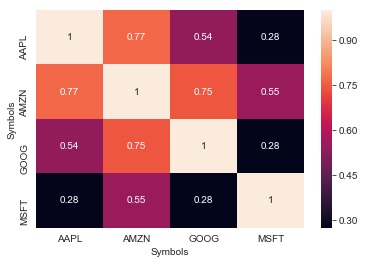

In [29]:
sns.heatmap(closing_df.corr(), annot=True)

In [30]:
rets = tech_rets.dropna()

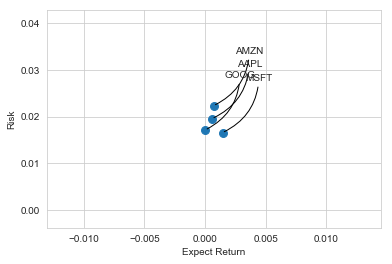

In [31]:
area = np.pi*20

plt.scatter(rets.mean(),rets.std(), s = area)

plt.xlabel('Expect Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3', color='black'))

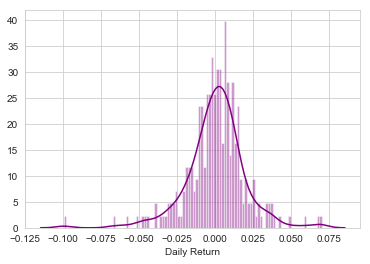

In [32]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

In [33]:
rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-06-27,-0.001464,-0.018083,-0.012946,-0.015543
2018-06-28,0.007276,0.024655,0.009276,0.011175
2018-06-29,-0.002102,-0.000970,0.001283,-0.000203
2018-07-02,0.011183,0.008224,0.010586,0.014197
2018-07-03,-0.017416,-0.011565,-0.021792,-0.009599


In [34]:
rets['AAPL'].quantile(0.05)

-0.031230763109850623

In [74]:

days = 365


dt = 1/days


mu = rets.mean()['GOOG']


sigma = rets.std()['GOOG']

In [81]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    
    price = np.zeros(days)
    price[0] = start_price
   
    shock = np.zeros(days)
    drift = np.zeros(days)
    
  
    for x in range(1,days):
        
     
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
       
        drift[x] = mu * dt
       
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [82]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-06-26,1133.209961,1116.659058,1128.000000,1118.459961,1563200,1118.459961
2018-06-27,1131.836060,1103.619995,1121.339966,1103.979980,1293900,1103.979980
2018-06-28,1122.310059,1096.010010,1102.089966,1114.219971,1072400,1114.219971
2018-06-29,1128.227051,1115.000000,1120.000000,1115.650024,1315100,1115.650024
2018-07-02,1128.000000,1093.800049,1099.000000,1127.459961,1217300,1127.459961


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

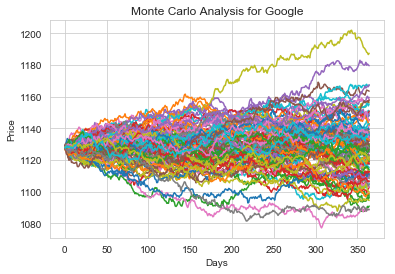

In [90]:
start_price = 1128.00

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    

plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [94]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] =  stock_monte_carlo(start_price, days,mu, sigma)[days-1]

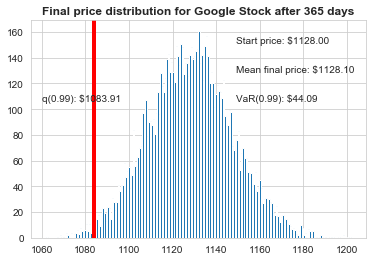

In [96]:
q = np.percentile(simulations,1)

plt.hist(simulations, bins=200)

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');